# ECO202 Writing Assignment Two
##### Author: Chenxu Robin Mao, 1008267475, robin.mao@mail.utoronto.ca

<br>

### Library Loading

In [118]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### 2. Inflation Rate

In [119]:
### Mexcian Inflation DataFrame

inflation_df = pd.read_csv('datasets/API_FP.CPI.TOTL.ZG_DS2_en_csv_v2_5350860.csv', on_bad_lines='skip')
inflation_df = inflation_df[inflation_df['Country Name'] == 'Mexico']
inflation_df = inflation_df.reset_index(drop=True)

if 'Country Code' in inflation_df:
    inflation_df = inflation_df.iloc[:, 4:]
inflation_df.style.set_caption('The Mexcian Inflation Rate')

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,4.927519,1.608760,1.198984,0.594055,2.337903,3.568039,4.215788,3.016948,2.333951,3.367003,5.003412,5.469029,4.943692,12.081939,23.784015,14.944535,15.824722,29.064125,17.457293,18.191246,26.351651,27.933763,58.913420,101.874938,65.448807,57.748448,86.233317,131.827384,114.162259,20.007877,26.651673,22.662359,15.507896,9.751460,6.965812,34.999271,34.378383,20.625629,15.928395,16.585617,9.491561,6.367738,5.030727,4.546900,4.688409,3.988057,3.629468,3.966849,5.124983,5.297356,4.156727,3.407378,4.111510,3.806391,4.018616,2.720641,2.821708,6.041457,4.899350,3.635961,3.396834,5.689208,nan


In [120]:
inflation_df = inflation_df.T

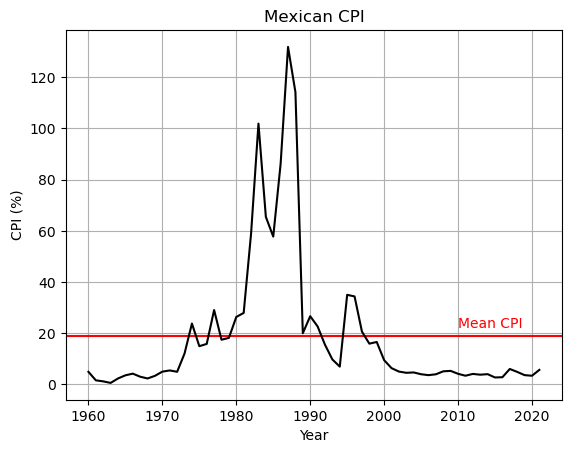

In [121]:
### plotting everything
fig, ax = plt.subplots()
#inflation_df = inflation_df.T
ax.set_ylabel('CPI (%)')
ax.set_xlabel('Year')
plt.axline(xy1=[0, inflation_df[0].mean()], xy2=[15, inflation_df[0].mean()], color='r')
ax.text(50, 22, 'Mean CPI', color='r')
inflation_df.plot(ax=ax,legend=False, color='black')
ax.set_title('Mexican CPI')
plt.grid(True)
plt.show()

### 3. Unemployment Rate

In [122]:
unemployment = pd.read_csv('datasets/API_SL.UEM.TOTL.ZS_DS2_en_csv_v2_5349643.csv')
unemployment = unemployment[unemployment['Country Name']=='Mexico'].reset_index(drop=True)
unemployment = unemployment.iloc[:, 4:]
unemployment = unemployment.dropna(axis=1)
mean = unemployment.iloc[0].mean()
unemployment.style

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,3.150000,3.240000,3.370000,4.440000,7.100000,5.470000,4.240000,3.730000,2.600000,2.650000,2.630000,3.000000,3.460000,3.940000,3.560000,3.570000,3.630000,3.870000,5.360000,5.300000,5.170000,4.890000,4.910000,4.810000,4.310000,3.860000,3.420000,3.270000,3.480000,4.450000,4.090000


In [123]:
unemployment = unemployment.T

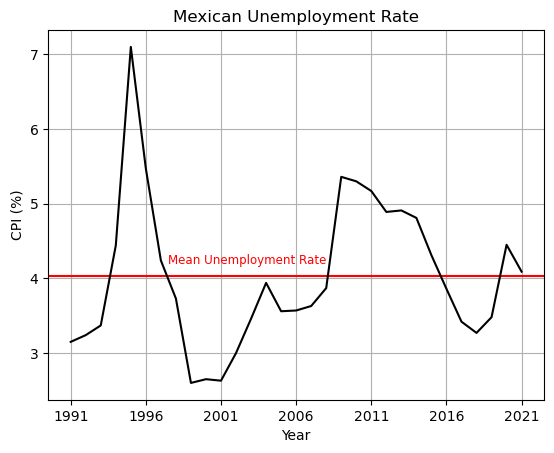

In [124]:
### plotting everything
fig, ax = plt.subplots()
#inflation_df = inflation_df.T
ax.set_ylabel('CPI (%)')
ax.set_xlabel('Year')
plt.axline(xy1=[0, mean], xy2=[15, mean], color='r')
ax.text(6.5, 4.2, 'Mean Unemployment Rate', color='r', size=8.5)
unemployment.plot(ax=ax,legend=False, color='black')
ax.set_title('Mexican Unemployment Rate')
plt.grid(True)
plt.show()

### 4. RGDP

In [125]:
RGDP = pd.read_csv('datasets/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_5351698.csv')
RGDP = RGDP[RGDP['Country Name']=='Mexico'].reset_index(drop=True)
RGDP = RGDP.iloc[:, 4:]

for i in range(len(RGDP)):
    RGDP.iloc[0, i] = RGDP.iloc[0, i] * 18.32

mean = RGDP.iloc[0].mean()

RGDP.style

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,238892800000.000000,14160000000.000000,15200000000.000000,16960000000.000000,20080000000.000000,21840000000.000000,24320000000.000000,26560000000.000000,29360000000.000000,32480000000.000000,35520000000.000000,39200000000.000000,45200000000.000000,55280000000.000000,72000000000.000000,88000000000.000000,89025974025.973999,81814159292.035400,102500000000.000000,134561403508.772003,205139086956.522003,263959336734.694000,184609157801.417999,156159198584.513000,184261495828.367004,195219789801.479004,134550096436.744003,147540738281.816986,181611549975.803986,221400669713.588989,261253582805.945007,313142768453.484985,363157598242.270020,500736065605.341003,527813238126.278015,360073909243.854980,410975595310.156006,500413483109.174988,526502129378.283997,600232874042.927002,707906744574.644043,756706300589.791016,772106378935.376953,729336319677.448975,782240601984.760010,877476221382.100952,975387131716.088989,1052696282278.869995,1109989063586.620117,900045350649.350952,1057801295584.050049,1180489601957.610107,1201089987015.449951,1274443084716.570068,1315351183524.540039,1171867608197.719971,1078490651625.310059,1158913035796.370117,1222408203104.300049,1269011767478.560059,1090515389749.410034,1272839334119.300049,nan


In [126]:
RGDP = RGDP.T

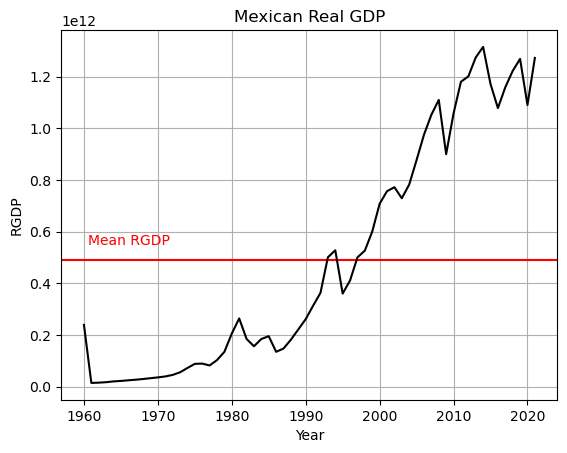

In [127]:
### plotting everything
fig, ax = plt.subplots()
#inflation_df = inflation_df.T
ax.set_ylabel('RGDP')
ax.set_xlabel('Year')
plt.axline(xy1=[0, mean], xy2=[15, mean], color='r')
ax.text(0.5, 550000000000, 'Mean RGDP', color='r')
RGDP.plot(ax=ax,legend=False, color='black')
ax.set_title('Mexican Real GDP')
plt.grid(True)
plt.show()

### 5. Comparsion between the Factors

In [128]:
RGDP = RGDP.rename(columns={0:'RGDP'})

In [129]:
unemployment = unemployment.rename(columns={0:'unemployment rate'})

In [130]:
inflation_df = inflation_df.rename(columns={0: 'inflation rate'})

In [131]:
df = pd.concat([RGDP, unemployment], join='inner',ignore_index=False, axis=1)
df = pd.concat([df, inflation_df], join='inner', ignore_index=False, axis=1)

In [132]:
df['RGDP_2'] = df['RGDP'] / 100000000000

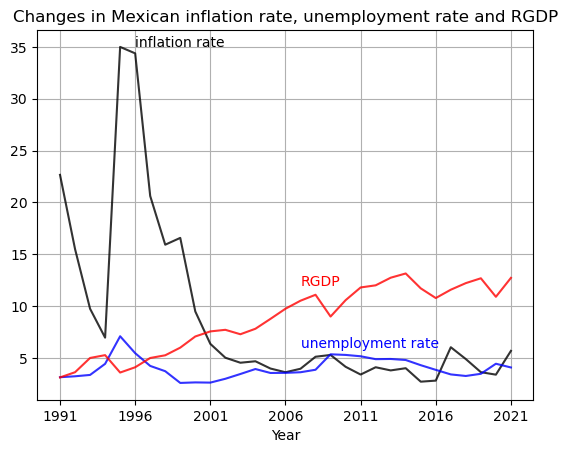

In [133]:
### plotting everything
fig, ax = plt.subplots()
ax.set_xlabel('Year')

df.plot(ax=ax, y='inflation rate',legend=False, color='black', alpha=0.8)
df.plot(ax=ax, y='unemployment rate',legend=False, color='b', alpha=0.8)
df.plot(ax=ax, y='RGDP_2',legend=False, color='r', alpha=0.8)

ax.text(16, 12, 'RGDP', color='r')
ax.text(16, 6, 'unemployment rate', color='blue')
ax.text(5, 35, 'inflation rate', color='black')

ax.set_title('Changes in Mexican inflation rate, unemployment rate and RGDP')
plt.grid(True)
plt.show()

### 6. Estimation on Philips Curve

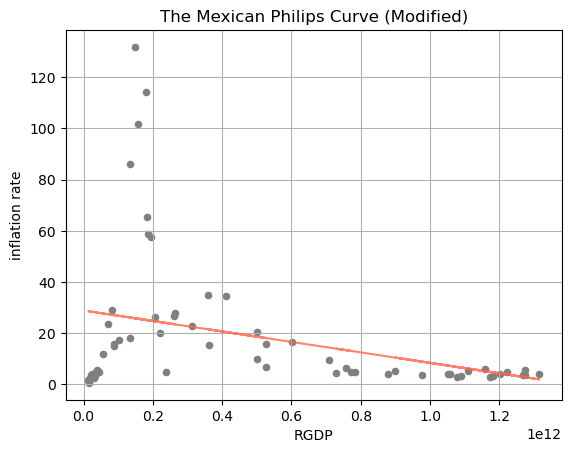

In [134]:
### if not using inflation change
# we want inflation and RGDP
fig, ax=plt.subplots()
PC_1 = pd.concat([inflation_df, RGDP], ignore_index=False, join='inner', axis=1)
PC_1 = PC_1.iloc[:-1,:]
PC_1.plot.scatter(ax=ax, x='RGDP', y='inflation rate', color='gray')
plt.title('The Mexican Philips Curve (Modified)')
inflation_lst = list(PC_1['inflation rate'])
rgdp_lst = list(PC_1['RGDP'])
coef = np.polyfit(rgdp_lst, inflation_lst, 1)
poly1d_fn = np.poly1d(coef)
plt.grid(True)
plt.plot(PC_1['RGDP'], poly1d_fn(PC_1['RGDP']), color='tomato', alpha=0.8)
plt.show()

In [135]:
print(coef)

[-2.04546654e-11  2.88825437e+01]


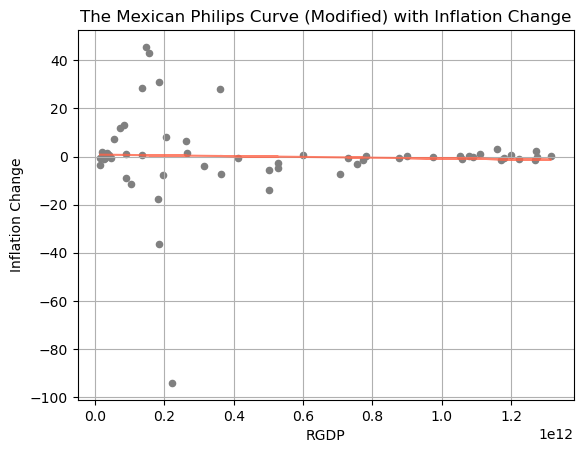

In [193]:
### if using inflation change

# query the data to get the change
inflation_diff = inflation_df.diff().iloc[1:-1,:]

fig, ax=plt.subplots()
PC_1 = pd.concat([inflation_diff, RGDP], ignore_index=False, join='inner', axis=1)
PC_1.plot.scatter(ax=ax, x='RGDP', y='inflation rate', color='gray')
plt.title('The Mexican Philips Curve (Modified) with Inflation Change')
inflation_lst = list(PC_1['inflation rate'])
rgdp_lst = list(PC_1['RGDP'])
coef = np.polyfit(rgdp_lst, inflation_lst, 1)
poly1d_fn = np.poly1d(coef)
ax.set_ylabel('Inflation Change')
plt.grid(True)
plt.plot(PC_1['RGDP'], poly1d_fn(PC_1['RGDP']), color='tomato', alpha=0.8)
plt.show()

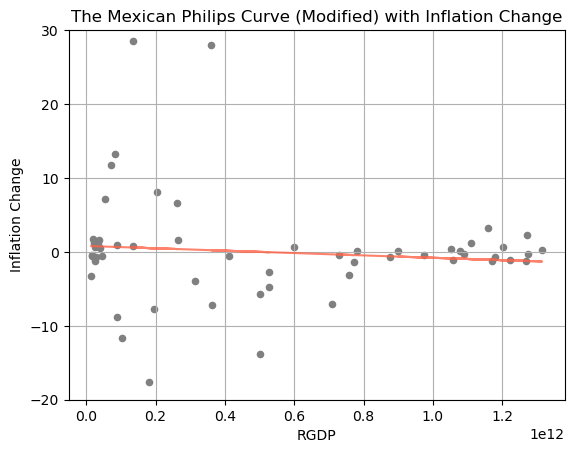

In [202]:
### if using inflation change

# query the data to get the change
inflation_diff = inflation_df.diff().iloc[1:-1,:]

fig, ax=plt.subplots()
PC_1 = pd.concat([inflation_diff, RGDP], ignore_index=False, join='inner', axis=1)
PC_1.plot.scatter(ax=ax, x='RGDP', y='inflation rate', color='gray')
plt.title('The Mexican Philips Curve (Modified) with Inflation Change')
inflation_lst = list(PC_1['inflation rate'])
rgdp_lst = list(PC_1['RGDP'])
coef = np.polyfit(rgdp_lst, inflation_lst, 1)
poly1d_fn = np.poly1d(coef)
ax.set_ylabel('Inflation Change')
ax.set_ylim(-20,30)
plt.grid(True)
plt.plot(PC_1['RGDP'], poly1d_fn(PC_1['RGDP']), color='tomato', alpha=0.8)
plt.show()

In [137]:
print(coef)

[-1.60257340e-12  8.04313644e-01]


In [194]:
PC_1

,inflation rate,RGDP
1961,-3.318759,1.416000e+10
1962,-0.409776,1.520000e+10
1963,-0.604929,1.696000e+10
1964,1.743848,2.008000e+10
1965,1.230135,2.184000e+10
...,...,...
2017,3.219749,1.158913e+12
2018,-1.142107,1.222408e+12
2019,-1.263389,1.269012e+12
2020,-0.239127,1.090515e+12


In [195]:
# calculating R^2 for Philips Curve
PC_1['expected inflation change'] = poly1d_fn(PC_1['RGDP'])
PC_1['geometric difference'] = (PC_1['inflation rate'] - PC_1['expected inflation change'])**2
SSE = PC_1['geometric difference'].sum()
PC_1['geometric mean difference'] = (PC_1['inflation rate'] - PC_1['inflation rate'].mean())**2
SST = PC_1['geometric mean difference'].sum()
print(1-SSE/SST)

0.001745146130990305


In [196]:
SSE

18133.32493122715

In [197]:
SST

18165.025555294313

In [199]:
print(18133.32493122715/len(PC_1))

297.2676218233959


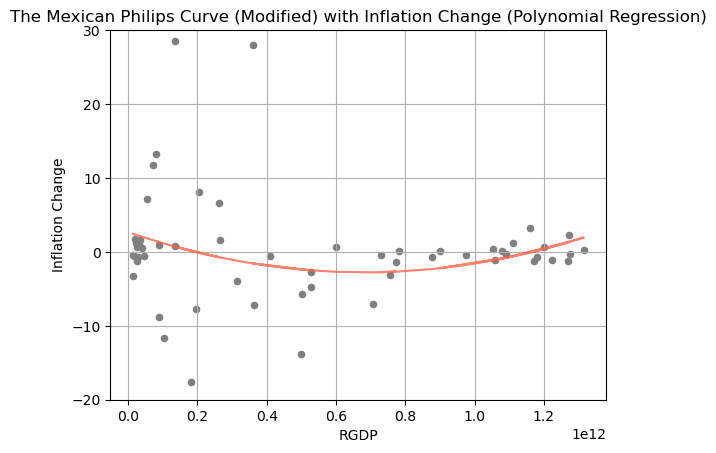

In [205]:
### if using inflation change

# query the data to get the change
inflation_diff = inflation_df.diff().iloc[1:-1,:]

fig, ax=plt.subplots()
PC_1 = pd.concat([inflation_diff, RGDP], ignore_index=False, join='inner', axis=1)
PC_1.plot.scatter(ax=ax, x='RGDP', y='inflation rate', color='gray')
plt.title('The Mexican Philips Curve (Modified) with Inflation Change (Polynomial Regression)')
inflation_lst = list(PC_1['inflation rate'])
rgdp_lst = list(PC_1['RGDP'])
coef = np.polyfit(rgdp_lst, inflation_lst, 2)
poly1d_fn = np.poly1d(coef)
ax.set_ylabel('Inflation Change')
ax.set_ylim(-20,30)
plt.grid(True)
plt.plot(PC_1['RGDP'], poly1d_fn(PC_1['RGDP']), color='tomato', alpha=0.8)
plt.show()

In [207]:
print(coef)

[ 1.17305673e-23 -1.59850531e-11  2.67317472e+00]


In [208]:
PC_1['expected inflation change'] = poly1d_fn(PC_1['RGDP'])
PC_1['geometric difference'] = (PC_1['inflation rate'] - PC_1['expected inflation change'])**2
SSE = PC_1['geometric difference'].sum()
PC_1['geometric mean difference'] = (PC_1['inflation rate'] - PC_1['inflation rate'].mean())**2
SST = PC_1['geometric mean difference'].sum()
print(1-SSE/SST)

0.010034378706649805


### 7. Okun's Law

In [154]:
# we need unemployment change and RGDP change

# query RGDP change
rgdp_change = RGDP.pct_change()
rgdp_change = rgdp_change.iloc[1:-1, :]

In [155]:
unemployment_change = unemployment.diff()
unemployment_change = unemployment_change.iloc[1:-1, :]
okundf = pd.concat([rgdp_change, unemployment_change], ignore_index=False, join='inner', axis=1)

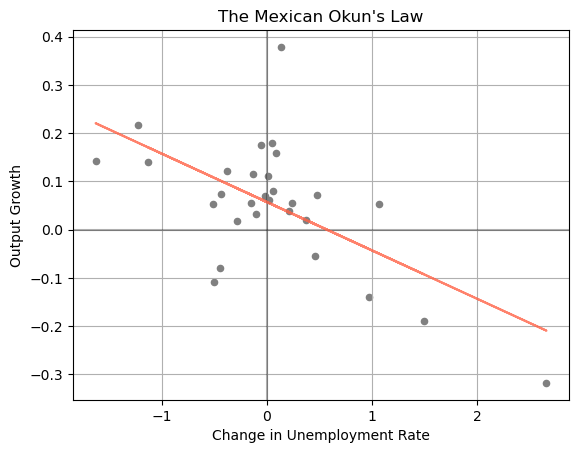

In [161]:
fig, ax = plt.subplots()
plt.axline(xy1=[-1.5,0], xy2=[2.5,0], color='black', alpha=0.3)
plt.axline(xy1=[0,0], xy2=[0,-0.2], color='black', alpha=0.3)
okundf.plot.scatter(ax=ax, x='unemployment rate', y='RGDP', color='gray')
ax.set_xlabel('Change in Unemployment Rate')
ax.set_ylabel('Output Growth')
plt.title('The Mexican Okun\'s Law')

# regreesion
unemployment_lst = list(okundf['unemployment rate'])
rgdp_lst = list(okundf['RGDP'])
coef = np.polyfit(unemployment_lst, rgdp_lst,  1)
poly1d_fn = np.poly1d(coef)
plt.plot(okundf['unemployment rate'], poly1d_fn(okundf['unemployment rate']), color='tomato', alpha=0.8)
plt.grid(True)
plt.show()

In [185]:
# calculating R^2 for Okun's Law
okundf['expected RGDP'] = poly1d_fn(okundf['unemployment rate'])
okundf['geometric difference'] = (okundf['RGDP'] - okundf['expected RGDP'])**2
SSE = okundf['geometric difference'].sum()
okundf['geometric mean difference'] = (okundf['RGDP'] - okundf['RGDP'].mean())**2
SST = okundf['geometric mean difference'].sum()
print(1-SSE/SST)

0.37746473436939865


In [186]:
SST

0.4971973087547591

In [187]:
SSE

0.30952285867646406

In [189]:
n = len(okundf)
n

29

### Disclaimer:

This notebook is a Appendix item for <ECO202_Mexico_Mao_1008267475>.